In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

# Changer le path vers le csv sur votre machine.
df = pd.read_csv('vehicules-circulation-2016.csv')

In [5]:
df.drop(['AN', 'NOSEQ_VEH', 'MRC'], 1, inplace=True)

In [ ]:
df.sort_values(['REG_ADM'], ascending=[True], inplace=True)
values= {'NB_CYL': 0,'NB_ESIEU_MAX':0,'CYL_VEH':0,'CYL_VEH':0,'PHYS_SEX':'X' }
df.fillna(values)

In [ ]:
dict_clas = {"PAU" : "Automobile ou camion léger", "PMC":"Motocyclette", "PCY":"Cyclomoteur", 
             "PHM" : "Habitation motorisée", "CAU":"Automobile ou camion léger", "CMC":"Motocyclette", "CCY":"Cyclomoteur",
              "CHM":"Habitation motorisée", "TTA":"Taxi", "TAB":"Autobus", "TAS":"Autobus scolaire", 
              "BCA":"Camion ou tracteur routier", "CVO":"Véhicule-outil", "COT":"Autres"}
df["CLAS"].replace(dict_clas, inplace =True )

dict_typ_veh = {"AB": "Autobus","AT": "Aucun type spécifique", "AU":"Automobile ou camion léger",
                "CA":"Camion ou tracteur routier", "CY":"Cyclomoteur", "HM":"Habitation motorisée",
               "MN":"Motoneige", "NV": "Autres véhicules hors route", "SN":"Souffleuse à neige", "VO":"Véhicule-outil",
               "VT":"Véhicule tout-terrain"}
df["TYP_VEH_CATEG_USA"].replace(dict_typ_veh, inplace=True)
df["TYP_VEH_CATEG_USA"].head()


In [12]:
sMan = df.loc[(df["PHYS_SEX"]=="M"),"PHYS_AGE"].value_counts()
dfMan = pd.DataFrame({"Age":sMan.index, "Count":sMan.values})

      Age  Count
0    55.0  86739
1    53.0  86244
2    52.0  85107
3    51.0  84853
4    54.0  84386
5    56.0  84198
6    57.0  83764
7    58.0  82623
8    59.0  81094
9    50.0  76795
10   60.0  75771
11   61.0  74727
12   49.0  72240
13   62.0  70979
14   48.0  68038
15   46.0  66767
16   63.0  66463
17   47.0  66319
18   45.0  65100
19   64.0  62953
20   44.0  61672
21   41.0  61557
22   65.0  60563
23   43.0  60170
24   39.0  60003
25   40.0  59994
26   36.0  59278
27   38.0  59092
28   42.0  59058
29   37.0  58577
..    ...    ...
60   79.0  17466
61   80.0  15831
62   18.0  14694
63   81.0  13640
64   82.0  12053
65   83.0  11068
66   84.0   9671
67   17.0   9109
68   85.0   7995
69   86.0   6332
70   87.0   4901
71   88.0   3765
72   16.0   3334
73   89.0   2752
74   90.0   1948
75   91.0   1437
76   92.0    863
77   15.0    746
78   93.0    568
79   14.0    379
80   94.0    365
81   95.0    241
82   96.0    105
83   97.0     58
84   98.0     24
85   99.0     21
86  101.0     

In [13]:
print("Number of women per age",df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts())

Number of women per age 53.0     48664
51.0     48396
52.0     48157
55.0     47171
54.0     47051
56.0     45934
50.0     44987
57.0     44776
58.0     43224
49.0     42424
59.0     41199
48.0     40630
46.0     39739
47.0     39729
45.0     39379
39.0     38563
36.0     38552
41.0     38424
38.0     38286
37.0     38286
60.0     38150
35.0     38127
40.0     37915
44.0     37431
61.0     37304
42.0     36992
34.0     36374
43.0     36149
62.0     34825
33.0     34491
         ...  
78.0      9890
79.0      8546
80.0      8143
81.0      7103
17.0      6175
82.0      6135
83.0      5575
84.0      4807
85.0      3826
86.0      3067
87.0      2355
16.0      1960
88.0      1818
89.0      1344
90.0       963
91.0       603
92.0       419
93.0       286
15.0       207
94.0       141
95.0       108
14.0        97
96.0        56
97.0        29
98.0        19
100.0       13
99.0         6
101.0        3
104.0        1
102.0        1
Name: PHYS_AGE, dtype: int64


In [14]:
print(df.groupby("PHYS_SEX")["PHYS_AGE"].count())


PHYS_SEX
F    2032622
M    3477054
Name: PHYS_AGE, dtype: int64


In [20]:
s1 = dfMan.query('Age > 13 & Age < 26')
s2 = dfMan.query('Age > 25 & Age < 36')
s3 = dfMan.query('Age > 35 & Age < 46')
s4 = dfMan.query('Age > 45 & Age < 56')
s5 = dfMan.query('Age > 55 & Age < 66')
s6 = dfMan.query('Age > 65 & Age < 76')
s7 = dfMan.query('Age > 75')

s1=s1['Count'].sum()
s2=s2['Count'].sum()
s3=s3['Count'].sum()
s4=s4['Count'].sum()
s5=s5['Count'].sum()
s6=s6['Count'].sum()
s7=s7['Count'].sum()

raw_data = {'Count': [s1, s2, s3, s4, s5, s6, s7],'Interval_Age': ['14-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']}
dfTest2 = pd.DataFrame(raw_data, columns = ['Count', 'Interval_Age'])


print(dfTest2)

    Count Interval_Age
0  256367        14-25
1  473502        26-35
2  604501        36-45
3  777488        46-55
4  743135        56-65
5  442973        66-75
6  179088          76+


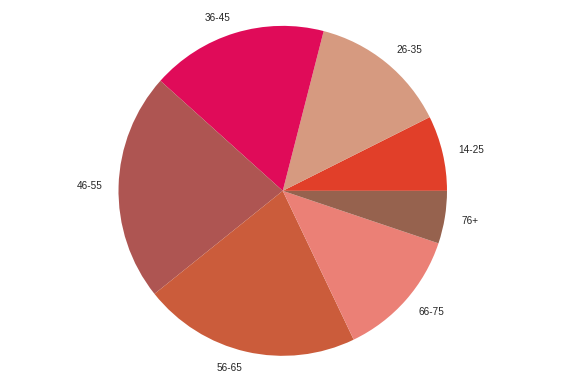

In [21]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfTest2['Count'],
    # with the labels being officer names
    labels=dfTest2['Interval_Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [18]:
#Code Younes avec Min et Max
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(dfMan.Age.min(), dfMan.Age.max(), 10)
print (dfMan.Age.min())
print (dfMan.Age.max())
groups = dfMan.groupby(pd.cut(dfMan.Age, bins))
print (groups.sum().Count)

14.0
104.0
Age
(14, 24]     212803
(24, 34]     459693
(34, 44]     596395
(44, 54]     755849
(54, 64]     769311
(64, 74]     474897
(74, 84]     176334
(84, 94]      30926
(94, 104]       467
Name: Count, dtype: int64


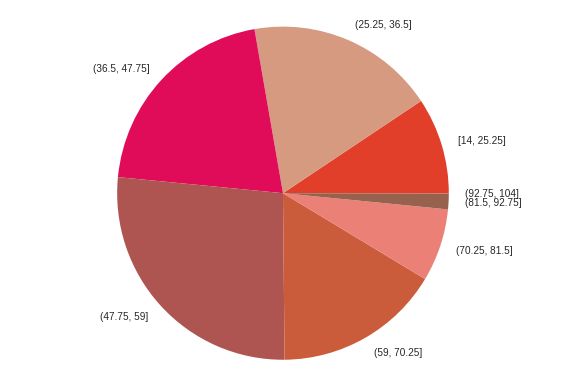

In [28]:
swoMan = df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts()
dfwoMan = pd.DataFrame({"Age":swoMan.index, "Count":swoMan.values})


#Code Younes avec Min et Max
# Bin the data frame by "a" with 10 bins...
bins = np.linspace(dfwoMan.Age.min(), dfwoMan.Age.max(),9)
groups = dfwoMan.groupby(pd.cut(dfwoMan.Age, bins, include_lowest=True))
swoManIntervals = groups.sum().Count
dfwoManIntervals = pd.DataFrame({"Age":swoManIntervals.index, "Count":swoManIntervals.values})


# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfwoManIntervals['Count'],
    # with the labels being officer names
    labels=dfwoManIntervals['Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [32]:
swoMan = df.loc[(df["PHYS_SEX"]=="F"),"PHYS_AGE"].value_counts()
dfwoman = pd.DataFrame({"Age":swoMan.index, "Count":swoMan.values})

s1 = dfwoman.query('Age > 13 & Age < 26')
s2 = dfwoman.query('Age > 25 & Age < 36')
s3 = dfwoman.query('Age > 35 & Age < 46')
s4 = dfwoman.query('Age > 45 & Age < 56')
s5 = dfwoman.query('Age > 55 & Age < 66')
s6 = dfwoman.query('Age > 65 & Age < 76')
s7 = dfwoman.query('Age > 75')

s1=s1['Count'].sum()
s2=s2['Count'].sum()
s3=s3['Count'].sum()
s4=s4['Count'].sum()
s5=s5['Count'].sum()
s6=s6['Count'].sum()
s7=s7['Count'].sum()

raw_data = {'Count': [s1, s2, s3, s4, s5, s6, s7],'Interval_Age': ['14-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']}
dfTest2 = pd.DataFrame(raw_data, columns = ['Count', 'Interval_Age'])


print(dfTest2)

    Count Interval_Age
0  189842        14-25
1  335733        26-35
2  379977        36-45
3  446948        46-55
4  377574        56-65
5  213780        66-75
6   88768          76+


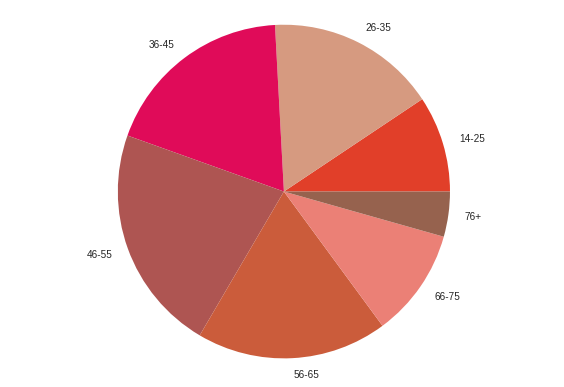

In [33]:

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#E00B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    dfTest2['Count'],
    # with the labels being officer names
    labels=dfTest2['Interval_Age'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()